<h2><center> The Road to DJ Patil is Filled with a Multitude of Potholes </center></h2>

<p>
Lee Anne Mercado<br / >
Maggie Chan<br / >
Tim Lee<br / >
Vinh Doan<br / >
Young Jin Yun<br / >
</p>

<h2>0. Imports that Allow Our Programs to Work:</h2>

In [37]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial
from pylab import rcParams
rcParams['figure.figsize'] = 10,10

<h2>1. Introduction and Background:</h2>

One of the most significant problems facing the United States today is the poor public infrastructure, especially when compared to places such as Europe. San diego is one such city that has an especially pronounced case of deteriorating transportation infrastructure, with potholes being one of the most commonly reported, and certainly very visible issues. Potholes are evident everywhere, from downtown San Diego to the local roads around the UCSD campus.

Our project was inspired by our personal experiences with the problems of persistent potholes – a hinderance that seems to cause universal frustration. According to the San Diego Tribune, there are merely "eight two-person crews that work each 10 hour shifts" when filling potholes (Wilkens, 2017). This results in an inefficient method because the process of fixing potholes is not prioritized effectively to concentrate on the areas that need it most. Consequently, the system is flawed and the priority areas can definitely be rearranged. 
 
<h4>Research Question:</h4>

People have become so desensitized to potholes that their frustration for them have become an everyday routine. For the safety of people and their cars, we asked, what approaches can be taken towards increasing the efficiency of pothole repair? And where should San Diego be allocating their pothole workers and resources? 

<h4>Hypothesis:</h4>

We predict that the following areas of concern are where the largest problems of potholes reside. These include the hindering of the bus transit system, reducing revenue earned from nearby affected parking meters, and a correlation of a slower rate a pothole is fixed with neglected areas of lower socioeconomic status in San Diego.

<h2>2. Methods:</h2>

<p><center><font color="red"><b>DATA SET: "GET IT DONE" (POTHOLES)</b></font></center></p>

First of all, "get it done" is a service that people report non-emergency problems to about a city such as San Diego. To begin our analyses of pothole impact, we needed to firstly clean the “Get it Done” data because it was filled with extraneous information about "get it done" reports such as graffiti locations, abandoned car locations, etc. 


After cleaning the data, we were left with the most relevant information about potholes: their latitude, longitude, their status (open or closed), their locations, and the duration it took to close the potholes. We then used this data with all the following data sets, as shown below in the rest of the report. 

In [ ]:
#upload get it done data set
df = pd.read_csv('clean_data/cleaned_get_it_done_closed_potholes.csv')

#dropping unnecessary data
df = df.drop(['address', 'sap_notification_number', 'sap_problem_code', 'service_subtype', 'source', \
            'referred_email_update', 'referral_email', 'functional_location', 'description', \
            'agency_responsible' , 'sap_problem_category', 'case_record_type', 'updated_datetime',\
            'service_request_id', 'parent_case_number'], axis = 1)

#drop all potholes 
df = df.drop(df[df.sap_problem_type != 'Pothole'].index)

#drop all NaNs for Long and Lat
df = df.dropna(subset = ['long'])
df = df.dropna(subset = ['lat'])

#drop all non-active potholes
df = df.drop(df[df.status_description == 'Duplicate'].index)
df = df.drop(df[df.status_description== 'Closed'].index)
df = df.drop(df[df.status_description=='Closed - Referred'].index)

In [17]:
#cleaned pothole data visualization
open_pots = pd.read_csv('clean_data/no_duplicates.csv')
open_pots

,Unnamed: 0,index,Unnamed: 0.1,Neighborhood,Unnamed: 0.1.1.1,closed,closed_date,coordinates,duplicate_verified,lat,...,mobile_web_status,open,override_duplicate,requested_datetime,sap_problem_type,service_name,status_description,Duration to Close (Hrs),closed_changed_date,Neighborhood_Val
0,0,14580,14580,Clairemont Mesa East,NaN,1.0,2016-05-25 18:43:00,32.7499397362632-117.1604238245755,0.0,32.749940,...,Closed,0.0,0.0,2016-05-23 07:23:00,Pothole,Pothole,Closed,59.333333,736109.779861,1
1,1,14579,14579,Clairemont Mesa East,NaN,1.0,2016-05-25 22:37:00,32.75000864226892-117.15906017908964,0.0,32.750009,...,Closed,0.0,0.0,2016-05-23 07:56:00,Pothole,Pothole,Closed,62.683333,736109.942361,1
2,2,15047,15047,Del Mar Heights,NaN,1.0,2016-05-25 22:37:00,32.95591580444838-117.25215208584706,0.0,32.955916,...,Closed,0.0,0.0,2016-05-20 10:43:00,Pothole,Pothole,Closed,131.900000,736109.942361,2
3,3,14576,14576,Clairemont Mesa East,NaN,1.0,2016-05-26 00:04:00,32.547334918542404-117.03421818981398,0.0,32.547335,...,Closed,0.0,0.0,2016-05-23 11:32:00,Pothole,Pothole,Closed,60.533333,736110.002778,1
4,4,14593,14593,Clairemont Mesa East,NaN,1.0,2016-05-27 00:02:00,32.8291986-117.1876013,0.0,32.829199,...,Closed,0.0,1.0,2016-05-22 20:30:00,Pothole,Pothole,Closed,99.533333,736111.001389,1
5,7,14601,14601,MIddletown,NaN,1.0,2016-05-27 00:02:00,32.8291929-117.188534,0.0,32.829193,...,Closed,0.0,1.0,2016-05-22 20:22:00,Pothole,Pothole,Closed,99.666667,736111.001389,5
6,8,14599,14599,MIddletown,NaN,1.0,2016-05-27 00:02:00,32.8284729-117.1874379,0.0,32.828473,...,Closed,0.0,1.0,2016-05-22 20:23:00,Pothole,Pothole,Closed,99.650000,736111.001389,5
7,9,14600,14600,Hillcrest,NaN,1.0,2016-05-27 00:02:00,32.82859700000001-117.1875945,0.0,32.828597,...,Closed,0.0,1.0,2016-05-22 20:23:00,Pothole,Pothole,Closed,99.650000,736111.001389,3
8,11,14597,14597,NaN,NaN,1.0,2016-05-27 00:02:00,32.829878-117.189484,0.0,32.829878,...,Closed,0.0,0.0,2016-05-22 20:25:00,Pothole,Pothole,Closed,99.616667,736111.001389,6
9,12,14596,14596,Carmel Mountain Ranch,NaN,1.0,2016-05-27 00:02:00,32.829841-117.188716,0.0,32.829841,...,Closed,0.0,0.0,2016-05-22 20:26:00,Pothole,Pothole,Closed,99.600000,736111.001389,7


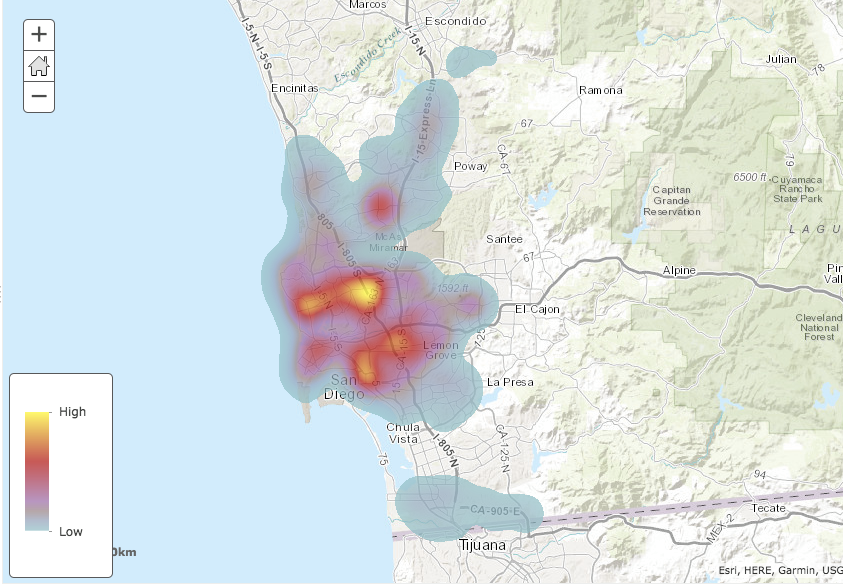

In [18]:
#heat map visualization of open potholes
Image("plots/openpots.png")

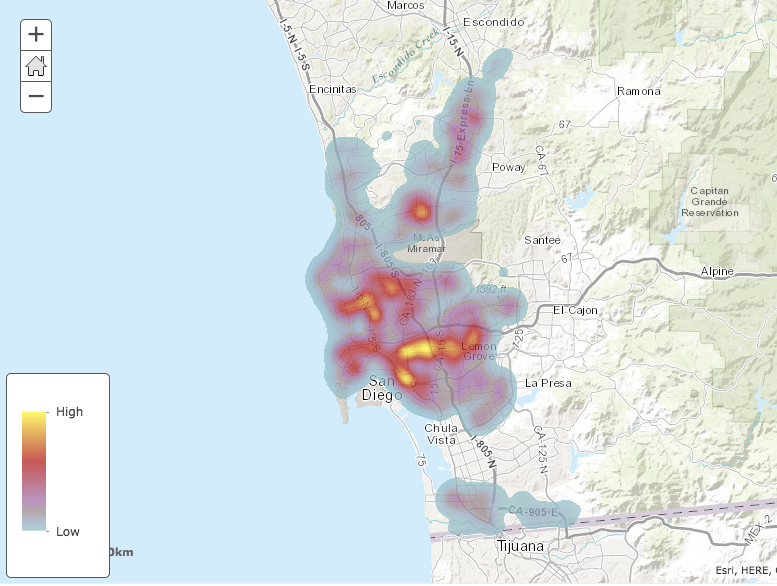

In [19]:
#heat map visualization of open potholes
Image("plots/closedpots.png")

<b><center>Pothole Heat Maps: Open and Closed</center></b>

We took the longitude and latitude information for each pothole and plotted it using a software called ArcGIS in order to make visualization easier. 

As you can see from the open potholes heat map, the most potholes are concentrated in the center (Mira Mesa). However, insead of allocating resources to focus on the area with the most potholes, the repairs seem to neglect Mira Mesa in the closed potholes heat map. This trend can possibly be attributed to the pothole repair schedule that the workers follow. The schedule consists of a set rotational cycle that runs through each San Diego Council District to the next on different days (SanDiego.gov). Although this system gives each Council District an equal opportunity for pothole repair, this system fails to address the most problematic areas for potholes.

<p><center><font color="red"><b>DATA SET: "POPULATION"</b></font></center></p>

There were some assumptions that we wanted to test, one of them being that the population of a neighborhood is correlated with the number of potholes in the corresponding neighborhood. We found population information for neighborhoods in San Diego and plotted their population to their pothole count. The following graph is our result:

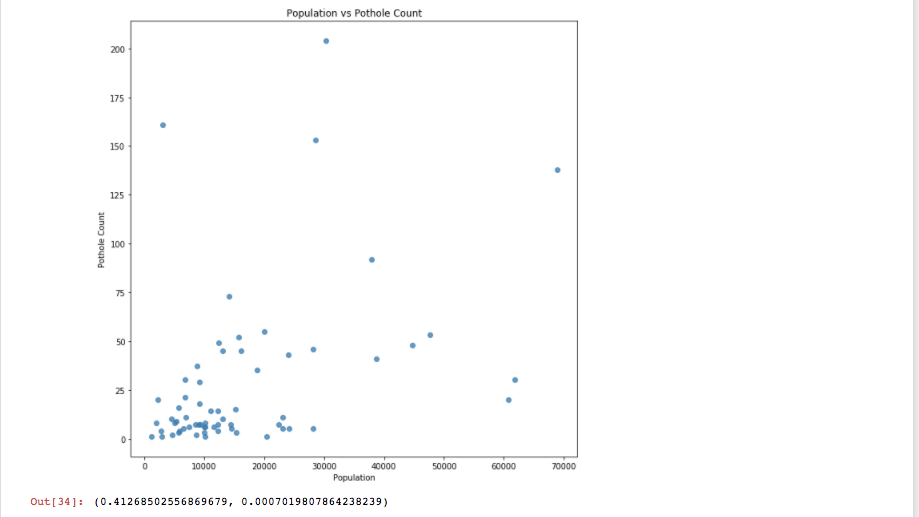

In [29]:
Image("plots/population.png")

Our research shows that there is a positive correlation between population and pothole count. 


We also used the pearson r function in order to further analyze this relationship. Although the correlation coefficient is not incredibly strong, the values are statistically acceptable based on the p-value, meaning some correlation exists between the Population of neighborhoods and the number of potholes in the region.

<p><center><font color="red"><b>DATA SET: "PARKING METERS LOCATIONS AND PARKING METERS TRANSACTIONS"</b></font></center></p>
We looked into parking meter locations around San Diego, their vicinity to potholes, and whether that affected how much they were making. This was an area of interest because if there was a correlation with potholes and parking meter income, the city should focus on these potholes in order to increase revenue.

We began by cleaning the data and removing irrelevant columns for both the parking meters locations and parking meters transactions:

In [ ]:
#upload parking meters locations
raw_trans = pd.read_csv('raw_data/treas_meters_2017_pole_by_mo_day_datasd.csv')

In [ ]:
#upload parking meters transactions 
clean_parking_loc = pd.read_csv('clean_data/parking_meter_location.csv')

In [ ]:
#drop rows with zero longitude and latitudes 
clean_parking_loc = clean_parking_loc.drop(clean_parking_loc[clean_parking_loc.longitude==0.000000].index)

#rename pole column header of clean_parking_loc data to 'pole_id' to match the header of the clean_combined_parking_meter_data dataset
clean_parking_loc.columns= ['index', 'pole_id', 'longitude', 'latitude']

#drop index column
clean_parking_loc = clean_parking_loc.drop(['index'], axis = 1)

#merge datasets based on matching parking meter IDs
merged_id = pd.merge(clean_parking_loc, clean_trans, on='pole_id')

After cleaning the data set, we were left to work with the latitude, longitude, and pole identifications of the parking meters. The parking meter transactions were added up based on pole ID to find the total revenue that pothole made and then combined with the parking meter location data to find exactly where each pole was located.  

In [ ]:
#sum of transaction amount based on pole_id
raw_trans['combined_parking_meter_data'] = raw_trans.groupby(['pole_id'])['sum_trans_amt'].transform('sum')

#drop columns 'meter_type', 'month', 'day', 'num_trans'
clean_trans = raw_trans.drop(['meter_type', 'month', 'day', 'num_trans'],axis = 1)

#eliminated duplicate sum value for each pole_id
clean_trans = clean_trans.drop_duplicates(subset=['pole_id'], keep='first')

#merge datasets based on matching parking meter IDs
merged_id = pd.merge(clean_parking_loc, clean_trans, on='pole_id')

In [20]:
#cleaned out combined data frame
combined_loc_trans_meters = pd.read_csv('clean_data/merged_parking_meters.csv')
combined_loc_trans_meters

,Unnamed: 0,pole_id,longitude,latitude,sum_trans_amt,combined_parking_meter_data
0,0,CC-1003,-117.145178,32.700353,85,27724
1,1,CC-1005,-117.145178,32.700352,250,31869
2,2,CC-1011,-117.145349,32.700155,515,57232
3,3,CC-1013,-117.145405,32.700107,345,37887
4,4,CC-1015,-117.145539,32.699987,390,25950
5,5,CC-1017,-117.145540,32.699985,50,30021
6,6,CC-1019,-117.145545,32.699981,70,30962
7,7,CC-1103,-117.145973,32.699544,110,47437
8,8,CC-1105,-117.145973,32.699545,360,49463
9,9,CC-1107,-117.146065,32.699490,425,45072


                                                        ---

Firstly, we compared the distribution of the distances of the parking meters to the closest pothole to random points around San Diego to the closest pothole. We were able to generate these random points by using the CA shapefile with QGIS, creating 60000 random points.

The QGIS process is as follows:

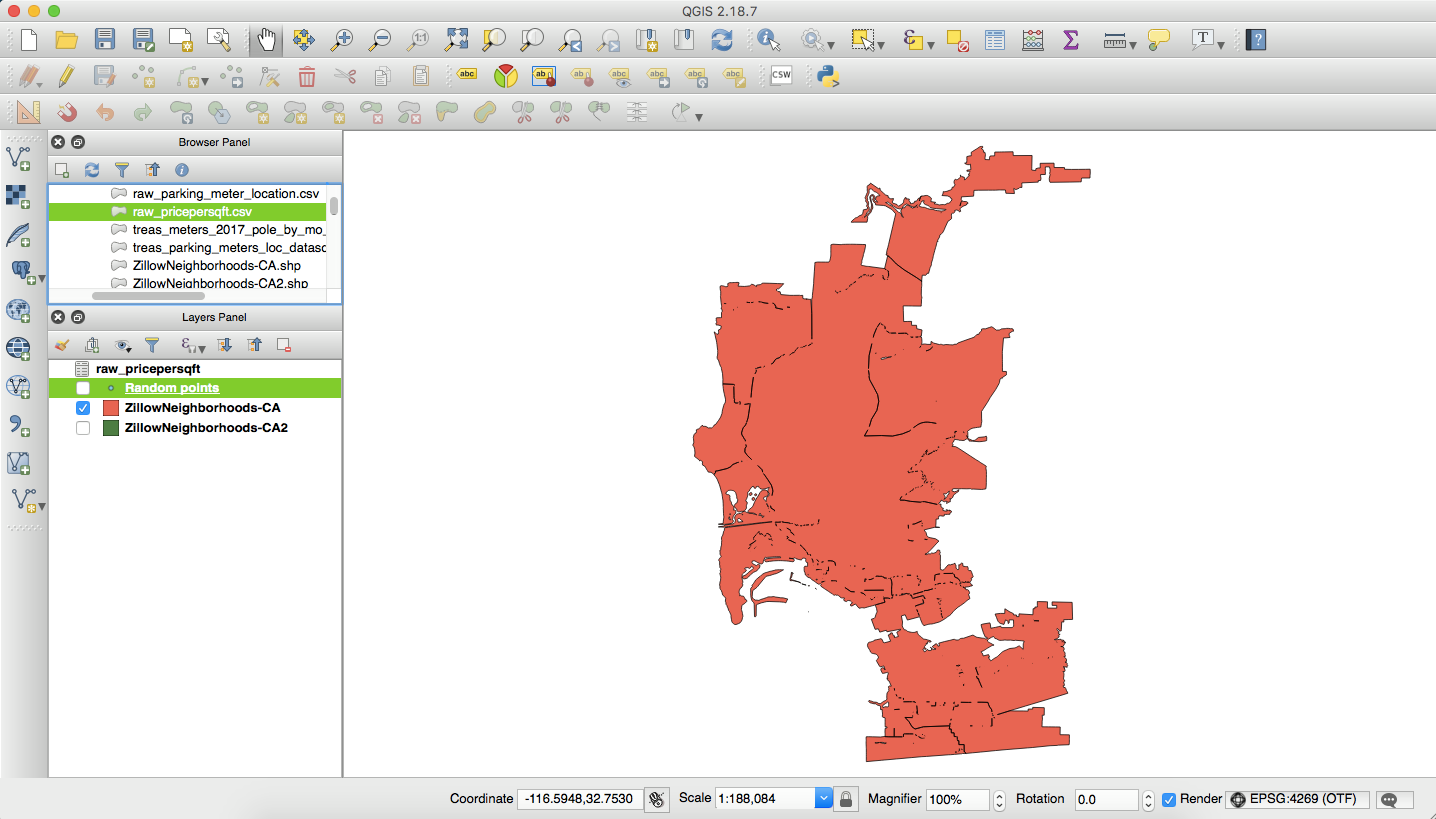

In [3]:
Image("plots/QGis1.png")

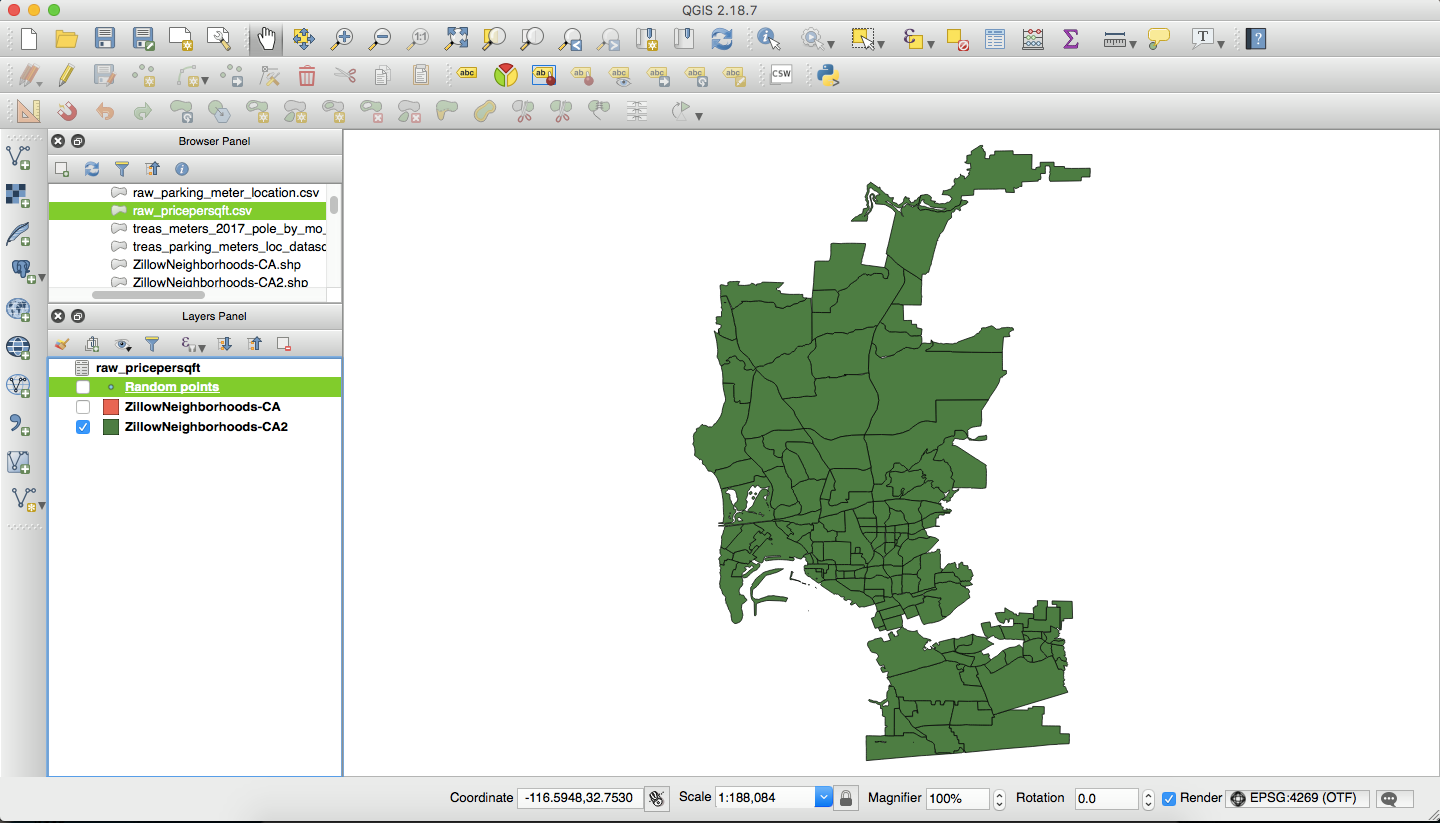

In [4]:
Image("plots/QGis2.png")

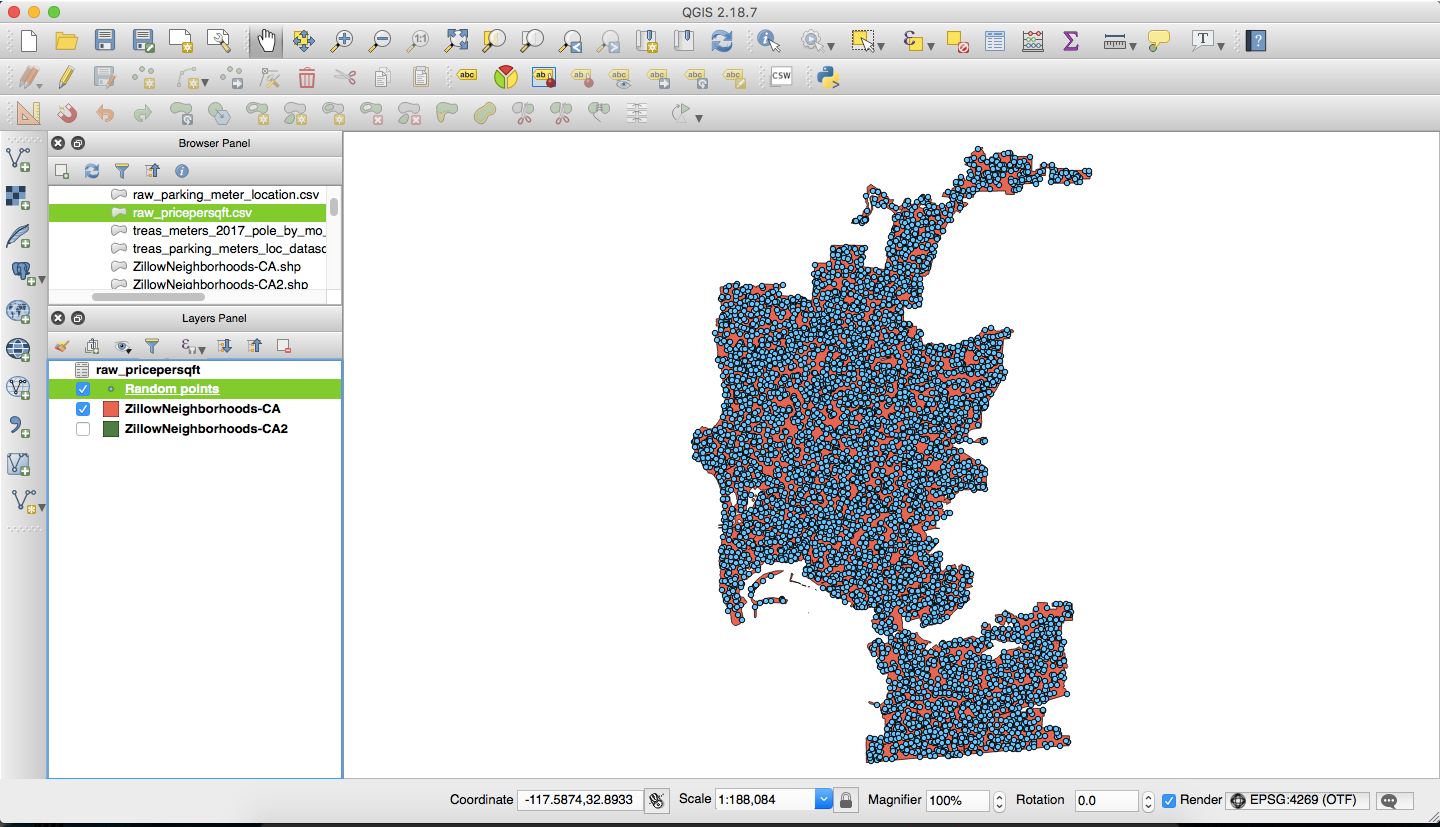

In [5]:
Image("plots/QGis3.png")

The comparison of the random points and meters are as follows:

In [ ]:
#Distances from Potholes to nearest Parking Meters
open_pot = pd.read_csv('Pr_087/clean_data/cleaned_get_it_done_open_potholes.csv')
open_pot = open_pot[~np.isnan(open_pot['long'])]
open_pot = open_pot[open_pot['long'] != 0]

meter_data = pd.read_csv('Pr_087/raw_data/raw_parking_meter_location.csv')
meter_data = meter_data[~np.isnan(meter_data['longitude'])]
meter_data = meter_data[meter_data['longitude'] != 0]

open_pot_coordinates = np.asarray(open_pot[['lat','long']])
meter_data_coordinates = np.asarray(meter_data[['latitude','longitude']])

#remove outlier
open_pot_coordinates = np.delete(open_pot_coordinates, 2293 ,axis=0) 

#Convert to utm
open_pot_coordinates = latlon_to_utm(open_pot_coordinates)
meter_data_coordinates = latlon_to_utm(meter_data_coordinates)

dist_meter_data = scipy.spatial.distance.cdist(open_pot_coordinates,meter_data_coordinates)
min_dist_indices = np.zeros(dist_meter_data.shape[0])
min_dists = np.zeros(dist_meter_data.shape[0])
for i in range(0,dist_meter_data.shape[0]):
    _ = np.argmin(dist_meter_data[i])
    min_dists[i] = dist_meter_data[i][_]
    min_dist_indices[i] = _    
    
min_dists2 = np.zeros(dist_meter_data.shape[1])
for j in range(0,dist_meter_data.shape[1]):
    _ = np.argmin(dist_meter_data.T[j])
    min_dists2[j] = dist_meter_data[_][j]
#merge meters with min dist to pothole
meter_data['nearest_pothole_dist'] = min_dists2
meter_data.to_csv('TimLeeBro.csv')
    
plt.close()
plt.figure(figsize=(10,10))
# plt.hist(np.log(min_dists), 50)
plt.hist(min_dists, 50)
plt.title('Distances from Potholes to nearest Parking Meters')
# plt.xlabel('Distance in meters (logged)')
plt.xlabel('Distance in meters')
plt.ylabel('Occurrences')
plt.show()
plt.close()
print('Mean:',np.mean(min_dists))

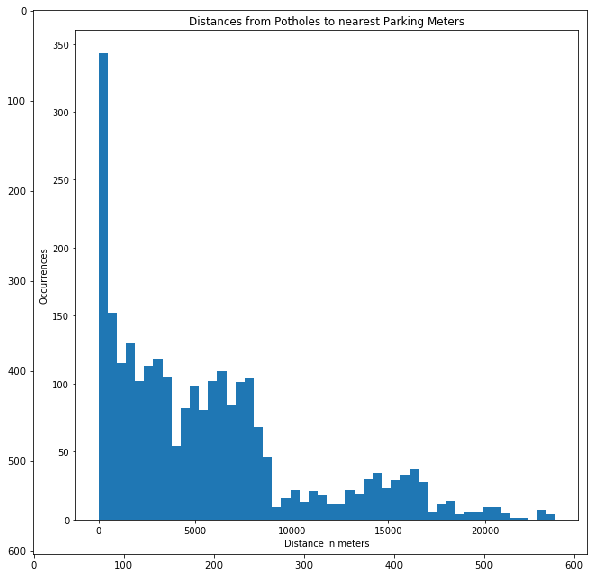

In [9]:
from scipy import misc
plt.imshow(misc.imread("plots/Distances_From_Potholes_To_Nearest_Parking_Meters.png"))
plt.show()

In [ ]:
#Distances from Random Points to Parking Meters
random_points = pd.read_csv('Pr_087/clean_data/randPoints6000.csv')
random_points_coordinates = np.asarray(random_points[['Y','X']])

#convert to utm
random_points_coordinates = latlon_to_utm(random_points_coordinates)

dist_meter_data = scipy.spatial.distance.cdist(random_points_coordinates,meter_data_coordinates)
min_dist_indices = np.zeros(dist_meter_data.shape[0])
min_dists = np.zeros(dist_meter_data.shape[0])
for i in range(0,dist_meter_data.shape[0]):
    _ = np.argmin(dist_meter_data[i])
    min_dists[i] = dist_meter_data[i][_]
    min_dist_indices[i] = _    

plt.close()
plt.figure(figsize=(10,10))
# plt.hist(np.log(min_dists), 50)
plt.hist(min_dists, 50)
plt.title('Distances from Random Points to Parking Meters')
# plt.xlabel('Distance in meters (Logged)')
plt.xlabel('Distance in meters')
plt.ylabel('Occurrences')
plt.show()
plt.close()
print('Mean:',np.mean(min_dists))

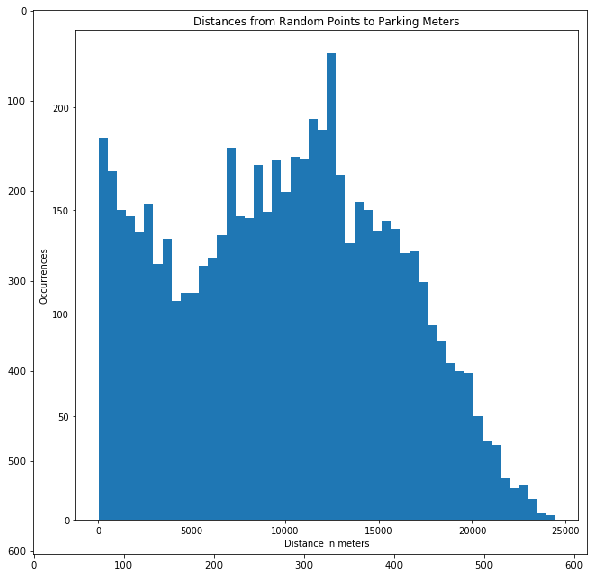

In [10]:
from scipy import misc
plt.imshow(misc.imread("plots/Distances_From_Random_Points_To_Nearest_Parking_Meters.png"))
plt.show()

We found that these graphs did not show any evidence of significant data, especially because there is evidently a large concentration of parking meters in one area, as seen in the first histogram above. It is therefore futile to compare this distribution with the random points in the city because it would evidently be skewed by the uneven spacing of parking meters throughout San Diego. 

                                                        ---

To ensure we did not need further analysis, we wanted to visualize and see where the parking meters were located using Arc GIS:

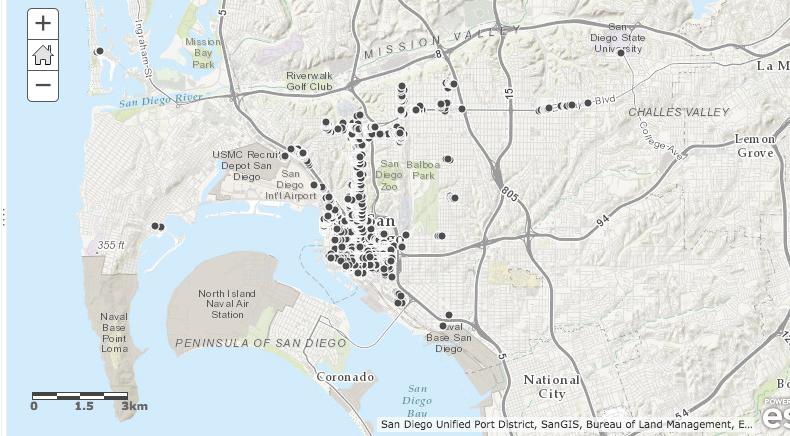

In [7]:
Image("plots/arcgispots.png")

As a result of this visualization, we concluded that it was not wise to further analyze this data because most of the parking meters listed from this set is concentrated in specific areas mainly in the downtown region, as seen above. This would explain why the histogram of the parking meter was so inconsistent; we assumed that there were parking meters dispersed throughout the city, but they were only concentrated in certain areas. 

<p><center><font color="red"><b>DATA SET: "TRANSIT STOPS LOCATIONS" </b></font></center></p>
The next variable we wanted to look at was how Bus Stops might have some relationship with potholes. We focused on this because potholes have been reported to damage heavier vehicles more; if busses were damages, it would cost the city money. The safety of the passengers of the bus is also a crucial factor the city should consider. Potholes have inficted irreversible consequences to the livelihood of everyday citizens. 

We followed a similar procedure to that of the parking meters for analyzing the bus stop locations. We started by cleaning the data set:

In [ ]:
#upload bus stops
bus_stops= pd.read_csv('/raw_data/CITY.TRANSIT_STOPS_GTFS_datasd.csv')

#dropping irrelevant columns 
clean_bus_stops = bus_stops[['LONGITUDE', 'LATITUDE']]

In [22]:
#cleaned out data frame visual of bus stops
bus_stops= pd.read_csv('clean_data/clean_bus_stops.csv')
bus_stops

,Unnamed: 0,OBJECTID,STOP_LAT,STOP_LON,LONGITUDE,LATITUDE
0,0,1,32.674458,-117.240426,-117.240414,32.674453
1,1,2,32.839578,-117.276187,-117.276175,32.839574
2,2,3,32.840128,-117.273810,-117.273798,32.840124
3,3,4,32.845847,-117.268673,-117.268661,32.845842
4,4,5,32.849312,-117.261752,-117.261740,32.849307
5,5,6,32.798101,-117.248250,-117.248238,32.798096
6,6,7,32.796529,-117.245834,-117.245822,32.796524
7,7,8,32.799294,-117.242774,-117.242762,32.799289
8,8,9,32.799650,-117.241202,-117.241191,32.799645
9,9,10,32.800124,-117.239063,-117.239051,32.800119


We were left with just the latitude and longitude of the bus stops, which we would again then compare the distances to the potholes with the random points obtained from earlier:

In [ ]:
#Distances of Potholes to nearest Bus Stop
dist_bus_data = scipy.spatial.distance.cdist(open_pot_coordinates,bus_stops_coordinates)
min_dist_indices = np.zeros(dist_bus_data.shape[0])
min_dists = np.zeros(dist_bus_data.shape[0])

for i in range(0,dist_bus_data.shape[0]):
    _ = np.argmin(dist_bus_data[i])
    min_dists[i] = dist_bus_data[i][_]
    min_dist_indices[i] = _   
    #Filter outliers
#     if dist_bus_data[i][_] > 7160:
#         print('WTF',i,':',dist_bus_data[i][_])

plt.close()
plt.figure(figsize=(10,10))
# plt.hist(np.log(min_dists), 50)
plt.hist(min_dists,50)
plt.title('Distances of Potholes to nearest Bus Stop')
# plt.xlabel('Distance in meters (logged)')
plt.xlabel('Distance in meters')
plt.ylabel('Occurrences')
plt.show()
plt.close()
print('Mean:',np.mean(min_dists))

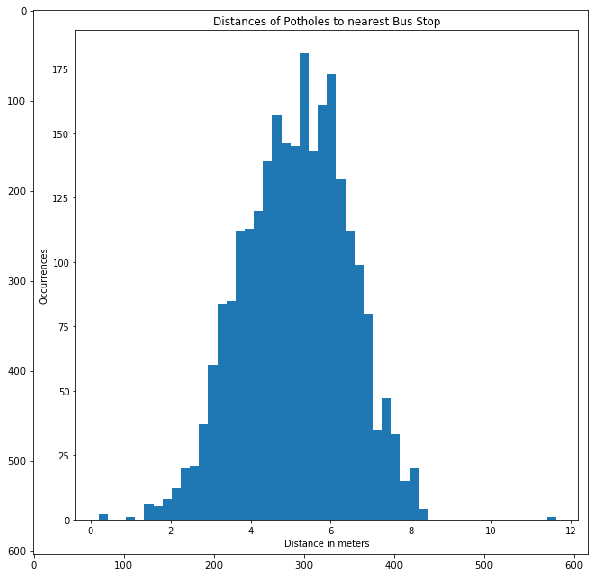

In [34]:
from scipy import misc
plt.imshow(misc.imread("plots/18944599_10211932266413953_977290067_n.png"))
plt.show()

In [ ]:
#Distances from Random Locations to nearest Bus Stops
plt.close()
plt.close()
random_points = pd.read_csv('Pr_087/clean_data/randomPoints.csv')
random_points_coordinates = np.asarray(random_points[['Y','X']])
random_points_coordinates = latlon_to_utm(random_points_coordinates)
dist_bus_data = scipy.spatial.distance.cdist(random_points_coordinates,bus_stops_coordinates)
print(np.mean(dist_bus_data))
min_dist_indices = np.zeros(bus_data.shape[0])
min_dists = np.zeros(dist_bus_data.shape[0])
for i in range(0,bus_data.shape[0]):
    _ = np.argmin(dist_bus_data[i])
    min_dists[i] = dist_bus_data[i][_]
    min_dist_indices[i] = _    
plt.figure(figsize=(10,10))
plt.hist(np.log(min_dists), 50)
# plt.hist(min_dists, 50)
plt.title('Distances from Random Locations to nearest Bus Stops')
plt.xlabel('Distances in meters logged')
# plt.xlabel('Distances in meters')
plt.ylabel('Occurrences')
plt.show()
plt.close()
print('Mean:',np.mean(min_dists))

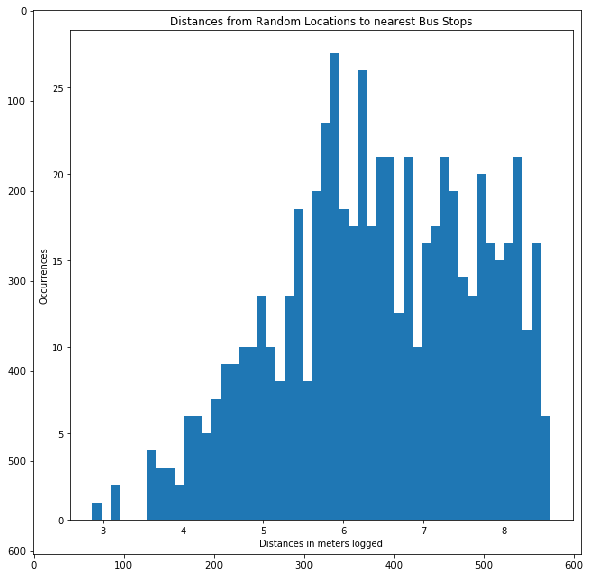

In [12]:
from scipy import misc
plt.imshow(misc.imread("plots/Distances_From_Random_Locations_To_Nearest_Bus_Stops.png"))
plt.show()

From both distribution graphs, we were able to conclude that there was actually a significant result. Evidently, by logging our pothole data (as shown above), the pothole distances to the bus stops are more shifted to the right compared to the normal distribution, making the data significant. As seen by the averages below, the averages of the minimum distance of potholes to the bus stops compared with the random points is much smaller. This indicates that the results are not just by chance; there are more potholes allocated near bus stop locations.  

Average of bus stop to nearest pothole: <b> 363.824322198</b>

Average of random points to nearest pothole: <b>1167.28134835</b>

                                                        ---


We took additional steps to further analyze this data set in relevance to potholes. In order to investigate 

<p><center><font color="red"><b>DATA SET: "Neighborhood_MedianValuePerSqft_AllHomes"  </b></font></center></p>
We then used Zillow's price per square foot data as a metric to represent the socioeconomic status of given areas of San Diego, which we could then use to correlate the effect of potholes to the surrounding area. We cleaned the data by dropping all the columns that did not pertain to location.

In [ ]:
#upload zillow data
zillowpd = pd.read_csv('/raw_data/Neighborhood_MedianValuePerSqft_AllHomes.csv') 

#remove all counties not san diego
zillowpdsd = zillowpd[zillowpd['CountyName'] == 'San Diego'] 
#remove uneccessary columns
zillowpdsd = zillowpdsd.drop('RegionID', 1)
zillowpdsd = zillowpdsd.drop('State', 1)
zillowpdsd = zillowpdsd.drop('SizeRank', 1)
#remove all but latest rent info
zillowpdsd2 = zillowpdsd[['RegionName', 'City','Metro','CountyName','2017-03']]


In [25]:
#cleaned out combined data frame
clean_zillow= pd.read_csv('clean_data/clean_latest_pricepersqft.csv')
clean_zillow

,Unnamed: 0,RegionName,City,Metro,CountyName,2017-03
0,75,Southwest,Chula Vista,San Diego,San Diego,290
1,79,Mira Mesa,San Diego,San Diego,San Diego,363
2,141,Northwest,Chula Vista,San Diego,San Diego,298
3,154,Rancho Penasquitos,San Diego,San Diego,San Diego,354
4,158,University City,San Diego,San Diego,San Diego,417
5,178,Rancho Bernardo,San Diego,San Diego,San Diego,335
6,188,Carmel Valley,San Diego,San Diego,San Diego,446
7,225,North Park,San Diego,San Diego,San Diego,465
8,295,Bay Terraces,San Diego,San Diego,San Diego,274
9,297,Otay Mesa West,San Diego,San Diego,San Diego,289


We found that the Zillow data only contained neighborhoods, thus we were not able to directly map the price/sqft with the potholes. So, we used geocoder with the pothole data to determine the neighborhoods of each pothole, which we could then map to the Zillow prices. Since geocoder limits the amount of data that can be run with it, we needed to run it in chunks and then combined all the neighborhoods for the open potholes as well as all the neighborhoods for the closed potholes. Yet, we found that some names did not match between the pothole neighborhoods and the zillow neighborhoods, so we discovered that we needed to use Bing API-which Zillow uses for its neighborhoods-to fill in the missing gaps.

In [26]:
#cleaned pothole data visualization
open_pots = pd.read_csv('clean_data/no_duplicates.csv')
open_pots

,Unnamed: 0,index,Unnamed: 0.1,Neighborhood,Unnamed: 0.1.1.1,closed,closed_date,coordinates,duplicate_verified,lat,...,mobile_web_status,open,override_duplicate,requested_datetime,sap_problem_type,service_name,status_description,Duration to Close (Hrs),closed_changed_date,Neighborhood_Val
0,0,14580,14580,Clairemont Mesa East,NaN,1.0,2016-05-25 18:43:00,32.7499397362632-117.1604238245755,0.0,32.749940,...,Closed,0.0,0.0,2016-05-23 07:23:00,Pothole,Pothole,Closed,59.333333,736109.779861,1
1,1,14579,14579,Clairemont Mesa East,NaN,1.0,2016-05-25 22:37:00,32.75000864226892-117.15906017908964,0.0,32.750009,...,Closed,0.0,0.0,2016-05-23 07:56:00,Pothole,Pothole,Closed,62.683333,736109.942361,1
2,2,15047,15047,Del Mar Heights,NaN,1.0,2016-05-25 22:37:00,32.95591580444838-117.25215208584706,0.0,32.955916,...,Closed,0.0,0.0,2016-05-20 10:43:00,Pothole,Pothole,Closed,131.900000,736109.942361,2
3,3,14576,14576,Clairemont Mesa East,NaN,1.0,2016-05-26 00:04:00,32.547334918542404-117.03421818981398,0.0,32.547335,...,Closed,0.0,0.0,2016-05-23 11:32:00,Pothole,Pothole,Closed,60.533333,736110.002778,1
4,4,14593,14593,Clairemont Mesa East,NaN,1.0,2016-05-27 00:02:00,32.8291986-117.1876013,0.0,32.829199,...,Closed,0.0,1.0,2016-05-22 20:30:00,Pothole,Pothole,Closed,99.533333,736111.001389,1
5,7,14601,14601,MIddletown,NaN,1.0,2016-05-27 00:02:00,32.8291929-117.188534,0.0,32.829193,...,Closed,0.0,1.0,2016-05-22 20:22:00,Pothole,Pothole,Closed,99.666667,736111.001389,5
6,8,14599,14599,MIddletown,NaN,1.0,2016-05-27 00:02:00,32.8284729-117.1874379,0.0,32.828473,...,Closed,0.0,1.0,2016-05-22 20:23:00,Pothole,Pothole,Closed,99.650000,736111.001389,5
7,9,14600,14600,Hillcrest,NaN,1.0,2016-05-27 00:02:00,32.82859700000001-117.1875945,0.0,32.828597,...,Closed,0.0,1.0,2016-05-22 20:23:00,Pothole,Pothole,Closed,99.650000,736111.001389,3
8,11,14597,14597,NaN,NaN,1.0,2016-05-27 00:02:00,32.829878-117.189484,0.0,32.829878,...,Closed,0.0,0.0,2016-05-22 20:25:00,Pothole,Pothole,Closed,99.616667,736111.001389,6
9,12,14596,14596,Carmel Mountain Ranch,NaN,1.0,2016-05-27 00:02:00,32.829841-117.188716,0.0,32.829841,...,Closed,0.0,0.0,2016-05-22 20:26:00,Pothole,Pothole,Closed,99.600000,736111.001389,7


Afterwards, in order to see whether or not there exist a relation between the density of potholes in a neighborhood and the neighborhood's real estate data, we decided to plot these factors on a scatter plot and see if some correlation exists. Since our prediction was that neighborhood "value" would affect pothole count, we set the Neighborhood Zillow data as the independent variable and the pothole count as the dependent variable. The scatter plot is as follows:

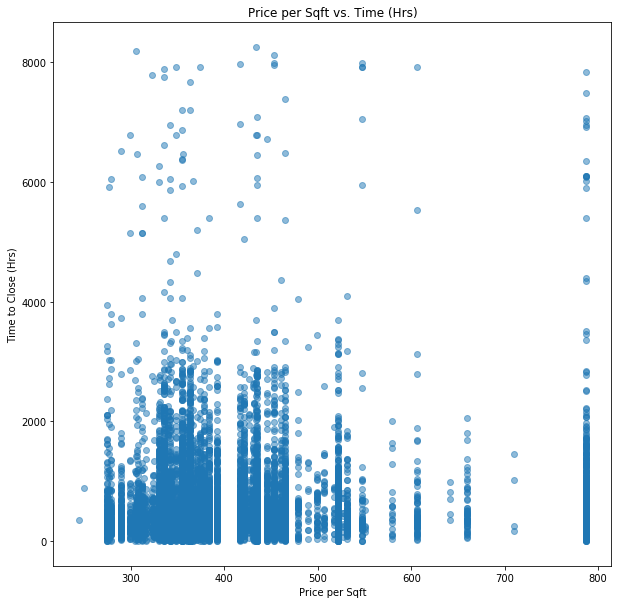

In [6]:
Image("plots/18944729_10211508935911672_426264008_n.png")

We decided to test the correlation using the pearson-r method from numpy. The results are as below:

In [ ]:
non_zero_df= pd.read_csv('clean_data/non_zero_price_closed.csv')

#logged pearson r
sp.pearsonr(np.log(non_zero_df['Neighborhood Prices']), np.log(non_zero_df['Duration to Close (Hrs)']))

#unlogged pearson r
sp.pearsonr(non_zero_df['Neighborhood Prices'], non_zero_df['Duration to Close (Hrs)'])

sp.spearmanr(non_zero_df['Neighborhood Prices'], non_zero_df['Duration to Close (Hrs)'])


Logged pearson r output: <b>(8.8260554967011282e-05, 0.99231720754669972)</b>

Unlogged pearson r output: <b>(0.016807668712271358, 0.066680376001256009)</b>

Spearman r output: <b> SpearmanrResult(correlation=0.0057672221366658833, pvalue= 0.52921749142692764)</b>

Because of the major difference between the log and unlogged data, we decided to use the spearman test instead; we realized that there is no significance with the data values, and concluded that a neighborhood's real estate prices does not affect the number of potholes in neighborhood in San Diego.
 

<h2>3. Conclusion</h2>

After visualizing our dataset, and choosing which combinations of features to analyze, we concluded that proximity to bus stops is the only variable that had a significant correlation with distance to nearest pothole. Our initial intuitions on the relationship between a region's socio-economic status and the turnaround time for San Diego's pothole maintenance crew for a certain request were proven not statistically significant. However, further investigation indicates that the city of San Diego can do considerably more to tackle the pothole crisis. Currently there is no correlation between turnaround time and a pothole's proximity to bus stops, nor is there a correlation with the extent to which the area in which a pothole is located is populated.  San Diego should attempt to create a new metric that is based off of multiple factors aside from just a round-robin rotation of city districts in orer to make the overal process more efficient and effective. 

In particular, areas with higher population and public transporation traffic should have more crews and resources assigned to them in order to reduce the negative effect potholes have on the populace. Given the current rate of pothole repair requests opening and the efforts of the current maintenance crew to fill them in, it is clear that the former is already outpacing the latter. San Diego need to not only assign resources more effectively, it needs to designate more resources in general.

<h2>4. Discussion</h2>

As a result of the data we used and the processes we failed to complete, there are several confounds in this report. First of all, we never took into account the rainy season, which is an important factor to consider because they are a possible reason for the increased number of potholes. Another important component that was never taken accounted for was the pothole sizes. We had no information about how large the potholes were, which would have probably affected the duration it took to close that pothole. The "Get it Done" data set also does not consider all existing potholes in the San Diego area because there are other ways that potholes could be reported. Finally, the report of the pothole information is not a clear indicator as to when they actually showed up, also affecting our conclusions. 

<h2>5. Future Work:</h2>

For future work, we plan to answer our research question about how San Diego should maximize the efficiency and effectiveness of its pothole repair program.
Our goal is to establish a "metric" to see how much a pothole should be prioritized based off this scale. The metric will consist of:
The population of the Neighborhood the Pothole resides in
The number of bus stops of the Neighborhood the Pothole resides in
The current number of active, open potholes in the Neighborhood the Pothole resides in.
The current rate at which Potholes are closed in the Neighborhood the Pothole resides in.
We would want San Diego to prioritize population because there is some correlation with pothole presence and population; also, the higher the population, the more frequently these potholes will cause problems for individuals living in those neigborhoods.
Secondly, bus stops would also be a heavier metric. Based on our analysis, potholes do tend to be closer to bus stops as opposed to random points; potholes can damage bus stops, which would mean San Diego would have to pay repair fees. Aside from that, potholes could endanger a large amount of individuals who are riding buses.
After combining these factors, we will create a metric that will categorize how much a pothole should be prioritized. We decided to stick with these metrics because they appear to be the most significant with the research we conducted. Combining these Metrics, we can associate each pothole with a "priority" index based on these four values.

<h2>6. Resources</h2>


John Wilkens 2017: http://www.sandiegouniontribune.com/news/transportation/sd-me-pothole-repair-20170208-story.html 

SanDiego.gov: https://www.sandiego.gov/sites/default/files/pothole_schedule_first_quarter_2017.pdf 